# En esta práctica, desarrollarás un modelo predictivo para prever las ventas futuras de productos clave como Vanish y Lysol. Utilizarás técnicas de regresión o análisis de series de tiempo, y asegurarás que el modelo esté correctamente entrenado y validado.

1.- Cargar y preparar los datos:
Carga el conjunto de datos consolidado que contiene las ventas históricas

2.- Seleccionar la técnica de modelado:
Decide si utilizarás un modelo de regresión (por ejemplo, regresión lineal múltiple) o un modelo de series de tiempo (por ejemplo, ARIMA, SARIMA).

3.- Justifica tu elección en base a los patrones observados en los datos.

4.- Dividir los datos en conjuntos de entrenamiento y prueba:
Divide los datos en conjuntos de entrenamiento (training) y prueba (testing) para validar el modelo.

5.- Utiliza un método como la división temporal o la validación cruzada si trabajas con series de tiempo.

6.- Construir y entrenar el modelo predictivo:
Si eliges una regresión, entrena el modelo utilizando las variables independientes seleccionadas y la variable dependiente (ventas).

7.- Si eliges un modelo de series de tiempo, ajusta el modelo ARIMA o SARIMA a las ventas históricas, seleccionando los parámetros óptimos mediante métodos como AIC o BIC.

8.- Validar el modelo:
Evalúa el desempeño del modelo utilizando métricas de error comunes como el error cuadrático medio (MSE), el error absoluto medio (MAE) o el porcentaje de error absoluto medio (MAPE).

9.- Realiza un gráfico de las predicciones frente a los datos reales para visualizar el ajuste del modelo.

10.- Ajustar y optimizar el modelo:
Realiza ajustes al modelo para mejorar su precisión (por ejemplo, ajustando hiperparámetros, eliminando variables no significativas o probando diferentes métodos de modelado).

11.- Documenta los cambios realizados y su impacto en el rendimiento del modelo.

Generar las predicciones futuras:
Utiliza el modelo optimizado para predecir las ventas futuras para los próximos meses.

Presenta las predicciones en un formato claro, como gráficos de líneas o tablas comparativas.

Documentar el proceso y los resultados:
Documenta todos los pasos del proceso de construcción del modelo, incluyendo la justificación de la técnica de modelado elegida, los resultados de la validación y los ajustes realizados.

Explica las predicciones obtenidas y proporciona recomendaciones basadas en los resultados del modelo.

# Los datos los obtuve de las tablas de POWER-BI, por medio de DAX Studio, se puede descargar en el siguiente enlace: https://daxstudio.org/
# En el entregable anterior se trabajaron y se limpiaron los datos

In [1]:
import pandas as pd
import numpy as np 

In [17]:
import matplotlib.pyplot as plt


In [2]:
FACTSALES= pd.read_csv("DataBases/FACT_SALES.csv", sep=";")
FACTSALES

,WEEK,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY,REGION,ITEM_CODE
0,48-22,0.001,0.023,1.0,SCANNING MEXICO,7501071903854
1,13-22,0.001,0.023,1.0,AREA 5,7501058796844
2,13-22,0.001,0.023,1.0,AREA 5,7501058796837
3,05-22,0.001,0.023,1.0,SCANNING MEXICO,7501025412401
4,48-22,0.001,0.023,1.0,SCANNING MEXICO,7501058796950BP1
...,...,...,...,...,...,...
121997,28-22,0.002,0.033,2.0,SCANNING MEXICO,7501058753205
121998,27-22,0.002,0.280,2.0,SCANNING MEXICO,7501080952980
121999,27-23,0.002,0.054,2.0,SCANNING MEXICO,0046500022746
122000,28-23,0.002,0.170,2.0,SCANNING MEXICO,7501042306561


In [3]:
PRODUCT= pd.read_csv("DataBases/DIM_PRODUCT.csv", sep=";")
PRODUCT

,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,ATTR2,ATTR3,CATEGORY,ITEM_CODE
0,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 250ML NAL. 000...,LIQUIDO,CLORO,CLORO,NO DEFINIDO,1,0000075000592
1,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 500ML NAL. 000...,LIQUIDO,CLORO,CLORO,NO DEFINIDO,1,0000075000608
2,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO,CLORO,NO DEFINIDO,1,0000075000615
3,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,CLORO,NO DEFINIDO,1,0000075000622
4,INDS. ALEN,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO,CLORO,NO DEFINIDO,1,0000075000639
...,...,...,...,...,...,...,...,...,...
500,RECKITT,VANISH,VANISH PODER 02 INTELIGENCE SIN CLORO SOBRE 30...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,7702626204208BP1
501,RECKITT,VANISH,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,7702626213774
502,RECKITT,VANISH,VANISH OXI ACTION CRISTAL WHITE DOYPACK 240 GR...,POLVO,SAFE BLEACH,FABRIC TREATMENT,BLANCO,1,7702626213781
503,RECKITT,VANISH,VANISH QUITAMANCHAS PRELAVADOR BARRA 75GR 7891...,BARRA,SAFE BLEACH,FABRIC TREATMENT,ROSA,1,7891035040191


In [4]:
CALENDAR= pd.read_csv("DataBases/DIM_CALENDAR.csv", sep=";")
CALENDAR

,WEEK,YEAR,MONTH,WEEK_NUMBER,DATE
0,01-21,2021,1,1,"domingo, 10 de enero de 2021"
1,01-22,2022,1,1,"domingo, 9 de enero de 2022"
2,01-23,2023,1,1,"lunes, 9 de enero de 2023"
3,02-21,2021,1,2,"domingo, 17 de enero de 2021"
4,02-22,2022,1,2,"domingo, 16 de enero de 2022"
...,...,...,...,...,...
151,51-22,2022,12,51,"domingo, 25 de diciembre de 2022"
152,51-23,2023,12,51,"lunes, 25 de diciembre de 2023"
153,52-21,2021,12,52,"domingo, 2 de enero de 2022"
154,52-22,2022,1,52,"domingo, 1 de enero de 2023"


# Unir DataFrames para el poder realizar el EDA y con este poder hacer la elección de los datos

In [5]:
df_VentasTotales= FACTSALES.merge(PRODUCT, how="left", on="ITEM_CODE")
df_VentasTotales

,WEEK,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY,REGION,ITEM_CODE,MANUFACTURER,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,ATTR2,ATTR3,CATEGORY
0,48-22,0.001,0.023,1.0,SCANNING MEXICO,7501071903854,CLOROX,CLOROX,CLOROX AROMA MAGIA FLORAL BOT PLAS 1890 ML NAL...,LIQUIDO,CLORO,CLORO,NO DEFINIDO,1
1,13-22,0.001,0.023,1.0,AREA 5,7501058796844,RECKITT,VANISH,VANISH SUPER BARRA WHITE GOLD SUPERPRECIO 2PZA...,BARRA,SAFE BLEACH,FABRIC TREATMENT,BLANCO,1
2,13-22,0.001,0.023,1.0,AREA 5,7501058796837,RECKITT,VANISH,VANISH SUPERBARRAGOLDC/ENZIMA SUPERPRECIO 2PZA...,BARRA,SAFE BLEACH,FABRIC TREATMENT,ROSA,1
3,05-22,0.001,0.023,1.0,SCANNING MEXICO,7501025412401,INDS. ALEN,CLORALEX,CLORALEX COLOR PODER VINAGRE BOT 950 ML NAL 75...,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR,1
4,48-22,0.001,0.023,1.0,SCANNING MEXICO,7501058796950BP1,RECKITT,VANISH,VANISHOXIACTIONROSAGELDOYPACK500ML+PLANCHYTEXB...,GEL,SAFE BLEACH,FABRIC TREATMENT,ROSA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121997,28-22,0.002,0.033,2.0,SCANNING MEXICO,7501058753205,RECKITT,VANISH,VANISH EXTRA-HIGIENE BOTELLA PLASTICO 900 ML 7...,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1
121998,27-22,0.002,0.280,2.0,SCANNING MEXICO,7501080952980,CHURCH & DWIGHT,OXI CLEAN,OXICLEAN POLVO BOTE 900GR +300GR= 1200 GR 7501...,POLVO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR,1
121999,27-23,0.002,0.054,2.0,SCANNING MEXICO,0046500022746,SC JOHNSON,SHOUT,SHOUT TRIPLE ACCION LAUNDRY/STAIN REMOVER BOTE...,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,PRE LAVADOR,1
122000,28-23,0.002,0.170,2.0,SCANNING MEXICO,7501042306561,QUIMICA GONCAL,CLORTEX,CLORTEX BLANQUEADOR MASCOTAS BOTELLA 3.75 LT 7...,LIQUIDO,CLORO,CLORO,MASCOTAS,1


In [6]:
df_VentasTotales = df_VentasTotales.merge(CALENDAR, how="left", on="WEEK")

In [7]:
import re

In [8]:
month_map = {
    "enero":1,"febrero":2,"marzo":3,"abril":4,"mayo":5,"junio":6,
    "julio":7,"agosto":8,"septiembre":9,"setiembre":9,"octubre":10,"noviembre":11,"diciembre":12
}

In [9]:
# Funcion para convertir fechas en español a objetos datetime
def parse_spanish_date(s):
    s = str(s).lower()
    m = re.search(r'(\d{1,2})\s+de\s+([a-záéíóúñ]+)\s+de\s+(\d{4})', s)
    if not m:
        return pd.NaT
    day = int(m.group(1))
    mon = m.group(2).replace("á","a").replace("é","e").replace("í","i").replace("ó","o").replace("ú","u")
    year = int(m.group(3))
    return pd.Timestamp(year, month_map[mon], day)

df_VentasTotales["DATE_DT"] = df_VentasTotales["DATE"].apply(parse_spanish_date)


In [10]:
df_VentasTotales = df_VentasTotales.drop(columns=["DATE","WEEK","MONTH","YEAR","ATTR3"])


In [12]:
df_VentasTotales = df_VentasTotales.drop(columns=["WEEK_NUMBER","CATEGORY","ATTR2","ATTR2", "MANUFACTURER"])
df_VentasTotales

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY,REGION,ITEM_CODE,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,DATE_DT
0,0.001,0.023,1.0,SCANNING MEXICO,7501071903854,CLOROX,CLOROX AROMA MAGIA FLORAL BOT PLAS 1890 ML NAL...,LIQUIDO,CLORO,2022-12-04
1,0.001,0.023,1.0,AREA 5,7501058796844,VANISH,VANISH SUPER BARRA WHITE GOLD SUPERPRECIO 2PZA...,BARRA,SAFE BLEACH,2022-04-03
2,0.001,0.023,1.0,AREA 5,7501058796837,VANISH,VANISH SUPERBARRAGOLDC/ENZIMA SUPERPRECIO 2PZA...,BARRA,SAFE BLEACH,2022-04-03
3,0.001,0.023,1.0,SCANNING MEXICO,7501025412401,CLORALEX,CLORALEX COLOR PODER VINAGRE BOT 950 ML NAL 75...,LIQUIDO,SAFE BLEACH,2022-02-06
4,0.001,0.023,1.0,SCANNING MEXICO,7501058796950BP1,VANISH,VANISHOXIACTIONROSAGELDOYPACK500ML+PLANCHYTEXB...,GEL,SAFE BLEACH,2022-12-04
...,...,...,...,...,...,...,...,...,...,...
121997,0.002,0.033,2.0,SCANNING MEXICO,7501058753205,VANISH,VANISH EXTRA-HIGIENE BOTELLA PLASTICO 900 ML 7...,LIQUIDO,SAFE BLEACH,2022-07-17
121998,0.002,0.280,2.0,SCANNING MEXICO,7501080952980,OXI CLEAN,OXICLEAN POLVO BOTE 900GR +300GR= 1200 GR 7501...,POLVO,SAFE BLEACH,2022-07-10
121999,0.002,0.054,2.0,SCANNING MEXICO,0046500022746,SHOUT,SHOUT TRIPLE ACCION LAUNDRY/STAIN REMOVER BOTE...,LIQUIDO,SAFE BLEACH,2023-07-10
122000,0.002,0.170,2.0,SCANNING MEXICO,7501042306561,CLORTEX,CLORTEX BLANQUEADOR MASCOTAS BOTELLA 3.75 LT 7...,LIQUIDO,CLORO,2023-07-17


# Usare un modelo SARIMA/SARIMAX.
 NO elegí un modelo de regresión lineal o regresión lineal múltiple como modelo principal porque con nuestra data sería complejo que "entienda" correctamente que las ventas de hoy o mañana dependen de semanas pasadas, que hay patrones repetitivos, etc.
 Además como tenemos varias variables cualitativas necesitariamos codificarlas para pasarlas por un modelo de regresión múltiple.
 Probablemente en la Serie encontremos Autocorrelación y Tendencia. SARIMA puede modelar estas cosas.

# SARIMA(p,d,q)(P,D,Q)

Antes de iniciar necesitamos agrupar por semana las ventas de cada item:

In [ ]:
# Agregar por semana + producto
df_VentasTotales_week = (df_VentasTotales.groupby(["DATE_DT", "ITEM_CODE"], as_index=False)
    .agg(value=("TOTAL_VALUE_SALES", "sum"),
    units=("TOTAL_UNIT_SALES", "sum"))
    .sort_values("DATE_DT"))
df_VentasTotales_week

,DATE_DT,ITEM_CODE,value,units
0,2022-01-09,0000075000592,3.915,0.870
174,2022-01-09,7501071901393,61.036,0.586
175,2022-01-09,7501071902086,804.606,26.498
176,2022-01-09,7501071902093,219.040,4.042
177,2022-01-09,7501071902109,976.438,10.016
...,...,...,...,...
20830,2023-07-17,7501025412104,506.510,26.833
20831,2023-07-17,7501025412135,361.112,7.332
20832,2023-07-17,7501025412142,43.029,0.292
20834,2023-07-17,7501025412401,373.589,15.087


# Split Train/Test (División temporal)
Recordemos que para series de tiempo no se diviendo los datos como tal, si no dejando las últimas semanas para las pruebas

In [27]:
top10_items = (df_VentasTotales_week.groupby("ITEM_CODE")["value"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index.astype(str)
    .tolist())

top10_items

['0000075000639',
 '0000075000622',
 '0000075000615',
 '7501025402051',
 '7501071900143',
 '7501025405212',
 '7501025450212',
 '7501025405090',
 '7501025405151',
 '7501025405106']

In [49]:
df_filtrado = df_VentasTotales[df_VentasTotales['ITEM_CODE'].isin(top10_items)].drop_duplicates(subset=['ITEM_CODE'])
df_filtrado.sort_values('ITEM_CODE', ascending=True)

,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY,REGION,ITEM_CODE,BRAND,ITEM_DESCRIPTION,FORMAT,ATTR1,DATE_DT
6762,48.696,738.242,81.842,AREA 1,0000075000615,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 950ML NAL. 000...,LIQUIDO,CLORO,2022-03-13
6758,35.013,886.972,59.851,AREA 1,0000075000622,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 2000ML NAL 000...,LIQUIDO,CLORO,2022-03-13
6760,15.844,643.920,27.176,AREA 1,0000075000639,CLORALEX,CLORALEX EL RENDIDOR BOT.PLAST. 3750ML NAL 000...,LIQUIDO,CLORO,2022-03-13
6744,28.491,929.271,54.063,AREA 1,7501025402051,BLANCATEL,BLANCATEL CONCENTRADO BOT PLAST 3750ML NAL 750...,LIQUIDO,CLORO,2022-03-13
6813,15.463,266.141,27.762,AREA 1,7501025405090,CLORALEX,CLORALEX ULTRAGEL CLORO GEL CONCENTRADO BOT 60...,GEL,CLORO,2022-04-24
6767,2.023,65.595,6.382,AREA 1,7501025405106,CLORALEX,CLORALEX CLORO EN GEL BP 2000ML 7501025405106,GEL,CLORO,2022-03-13
6770,8.782,153.007,18.183,AREA 1,7501025405151,CLORALEX,CLORALEX CLORO EN GEL BOT 950ML 7501025405151,GEL,CLORO,2022-03-13
6815,8.227,194.587,19.000,AREA 1,7501025405212,CLORALEX,CLORALEX ULTRAGEL CLORO EN GEL CONCENTRADO 950...,GEL,CLORO,2022-04-24
6757,1.145,30.702,104.091,AREA 1,7501025450212,CLORALEX,CLORALEX EL RENDIDOR BOT 1900+100ML= 2LT 75010...,LIQUIDO,CLORO,2022-03-13
6699,5.624,198.409,17.357,AREA 1,7501071900143,CLOROX,CLOROX REGULAR CONCENTRADO BOTPLAST.3800ML 750...,LIQUIDO,CLORO,2022-03-13


In [46]:
df_week = df_VentasTotales_week.copy()

# Tipos limpios
df_week["DATE_DT"] = pd.to_datetime(df_week["DATE_DT"], errors="coerce")
df_week = df_week.dropna(subset=["DATE_DT"])

df_week["ITEM_CODE"] = df_week["ITEM_CODE"].astype(str).str.strip()

# Para que los que tienen ceros a la izquierda siempre matcheen:
df_week["ITEM_CODE"] = df_week["ITEM_CODE"].str.zfill(13)

# Asegurar que la semana sea consistente (en tu caso parece domingo)
df_week["WEEK_DT"] = df_week["DATE_DT"].dt.to_period("W-SUN").dt.end_time.dt.normalize()

# Por seguridad, reagrega (por si hay duplicados en una misma semana)
df_week = (df_week.groupby(["WEEK_DT", "ITEM_CODE"], as_index=False)
    .agg(value=("value", "sum"), units=("units", "sum"))
    .sort_values("WEEK_DT"))

In [47]:
def get_series_item(df_week, item_code, freq="W-SUN"):
    item_code = str(item_code).strip().zfill(13)

    df_i = df_week[df_week["ITEM_CODE"] == item_code].copy()
    if df_i.empty:
        return None

    y = (df_i.set_index("WEEK_DT")["value"]
        .sort_index()
        .astype(float))

    # índice semanal completo
    idx = pd.date_range(y.index.min(), y.index.max(), freq=freq)
    y = y.reindex(idx).fillna(0.0)

    return y


In [48]:
series_top10 = {}

for item in top10_items:
    y = get_series_item(df_week, item)
    if y is not None:
        series_top10[item] = y

len(series_top10), list(series_top10.keys())[:3]


(10, ['0000075000639', '0000075000622', '0000075000615'])

In [44]:
y = series_top10[top10_items[0]]


# Construir y entrenar el modelo predictivo:


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

### Función para AIC: 

In [50]:
test_weeks = 12

y = y.astype(float).sort_index()
y_train = y.iloc[:-test_weeks]
y_test  = y.iloc[-test_weeks:]

print("Train semanas:", len(y_train))
print("Test semanas:", len(y_test))


Train semanas: 69
Test semanas: 12


In [51]:
y

2022-01-09    1393.342
2022-01-16    1438.885
2022-01-23    1124.425
2022-01-30    1115.460
2022-02-06    1248.424
                ...   
2023-06-25    3620.180
2023-07-02    3384.975
2023-07-09    4283.412
2023-07-16    3930.434
2023-07-23    3875.789
Freq: W-SUN, Name: value, Length: 81, dtype: float64

In [52]:
def select_sarima_by_aic(y_train, s=52):
    y_train = pd.to_numeric(y_train, errors="coerce").fillna(0).astype(float)
    y_log = np.log1p(y_train)

    candidates = [
        ((1,0,1), (1,0,1,s)),
        ((1,0,1), (1,1,1,s)),
        ((2,0,1), (1,0,1,s)),
        ((1,0,2), (1,0,1,s)),
        ((2,0,2), (1,1,1,s)),
        ((0,1,1), (0,1,1,s)),
        ((1,1,1), (1,1,1,s)),
        ((0,1,1), (1,1,0,s)),
    ]

    rows = []
    best_aic = np.inf
    best_res = None
    best_cfg = None

    for order, seasonal_order in candidates:
        try:
            model = SARIMAX(
                y_log,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            res = model.fit(disp=False)

            rows.append({
                "order": order,
                "seasonal_order": seasonal_order,
                "AIC": res.aic,
                "BIC": res.bic
            })

            if res.aic < best_aic:
                best_aic = res.aic
                best_res = res
                best_cfg = (order, seasonal_order)

        except Exception as e:
            rows.append({
                "order": order,
                "seasonal_order": seasonal_order,
                "AIC": np.nan,
                "BIC": np.nan
            })

    df_aic = pd.DataFrame(rows).sort_values("AIC")
    return best_res, best_cfg, df_aic

In [55]:
best_res, best_cfg, df_aic = select_sarima_by_aic(y_train, s=52)

print("Mejor configuración por AIC:", best_cfg)
df_aic.head(10)


Mejor configuración por AIC: ((1, 0, 2), (1, 0, 1, 52))


,order,seasonal_order,AIC,BIC
3,"(1, 0, 2)","(1, 0, 1, 52)",-24.112931,-20.278587
2,"(2, 0, 1)","(1, 0, 1, 52)",-21.103155,-16.854854
0,"(1, 0, 1)","(1, 0, 1, 52)",-15.773457,-12.233206
5,"(0, 1, 1)","(0, 1, 1, 52)",6.000000,NaN
7,"(0, 1, 1)","(1, 1, 0, 52)",6.000000,NaN
1,"(1, 0, 1)","(1, 1, 1, 52)",10.000000,NaN
6,"(1, 1, 1)","(1, 1, 1, 52)",10.000000,NaN
4,"(2, 0, 2)","(1, 1, 1, 52)",14.000000,NaN


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred_log = best_res.get_forecast(steps=len(y_test)).predicted_mean
y_pred = np.expm1(pred_log).clip(lower=0)
y_pred = pd.Series(y_pred.values, index=y_test.index)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

denom = np.where(y_test.values == 0, 1, y_test.values)
mape = np.mean(np.abs((y_test.values - y_pred.values) / denom)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE%:", mape)


MAE: 591.4513478041184
RMSE: 802.8891682999054
MAPE%: 15.24947557900358


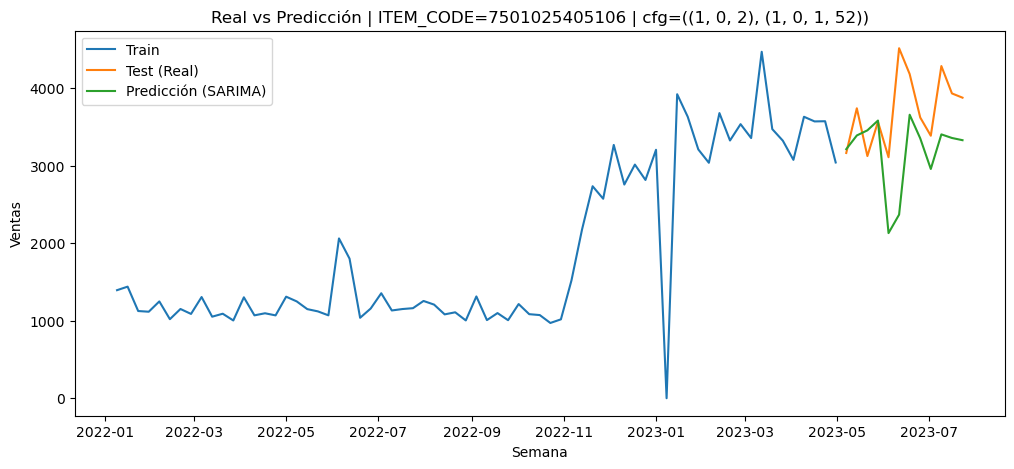

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train.values, label="Train")
plt.plot(y_test.index, y_test.values, label="Test (Real)")
plt.plot(y_pred.index, y_pred.values, label="Predicción (SARIMA)")
plt.title(f"Real vs Predicción | ITEM_CODE={item} | cfg={best_cfg}")
plt.xlabel("Semana")
plt.ylabel("Ventas")
plt.legend()
plt.show()


# Validar el modelo

In [57]:
y_naive = pd.Series(y_train.iloc[-1], index=y_test.index)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_naive = mean_absolute_error(y_test, y_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_naive))

denom = np.where(y_test.values == 0, 1, y_test.values)
mape_naive = np.mean(np.abs((y_test.values - y_naive.values) / denom)) * 100

print("NAIVE -> MAE:", mae_naive, "RMSE:", rmse_naive, "MAPE%:", mape_naive)
print("SARIMA-> MAE:", mae,       "RMSE:", rmse,       "MAPE%:", mape)


NAIVE -> MAE: 667.0799166666666 RMSE: 803.8575296075481 MAPE%: 16.791695377817177
SARIMA-> MAE: 591.4513478041184 RMSE: 802.8891682999054 MAPE%: 15.24947557900358


# Ajustar y optimizar el modelo:


Para optimizar el modelo, se comparó el desempeño de SARIMA contra un baseline NAIVE, el cual pronostica la siguiente semana como el último valor observado. El modelo SARIMA fue seleccionado mediante criterio AIC, buscando la mejor combinación de hiperparámetros. Como resultado, SARIMA mejoró el desempeño respecto al baseline: el MAE se redujo de 667.08 a 591.45 (≈11.3% de mejora) y el MAPE disminuyó de 16.79% a 15.25% (≈9.2% de mejora relativa). El RMSE permaneció prácticamente igual, lo que sugiere que aún existen semanas con variaciones bruscas (picos de demanda) difíciles de capturar con un modelo univariado.

# Generar las predicciones futuras:

In [ ]:
n_future = 12     # 12 semanas ~ 3 meses
test_weeks = 12
s = 52            # estacionalidad anual en semanas

forecast_weekly = {}
forecast_monthly = {}
best_cfgs = {}

for item in top10_items:
    y = series_top10[item].astype(float).sort_index()

    # split temporal (solo para elegir cfg por AIC con train)
    y_train = y.iloc[:-test_weeks]

    # 1) Elegir mejor SARIMA por AIC
    best_res, best_cfg, df_aic = select_sarima_by_aic(y_train, s=s)
    best_cfgs[item] = best_cfg

    order, seasonal_order = best_cfg

    # 2) Re-entrenar con TODO el histórico (modelo final)
    y_log_full = np.log1p(y)

    final_model = SARIMAX(
        y_log_full,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    final_res = final_model.fit(disp=False)

    # 3) Forecast futuro (semanal)
    pred_log = final_res.get_forecast(steps=n_future).predicted_mean
    pred = np.expm1(pred_log).clip(lower=0)

    # índice futuro semanal (usa la misma freq de y)
    freq = y.index.freqstr if y.index.freqstr is not None else "W-SUN"
    future_idx = pd.date_range(y.index.max() + pd.Timedelta(weeks=1), periods=n_future, freq=freq)

    y_forecast = pd.Series(pred.values, index=future_idx, name=item)
    forecast_weekly[item] = y_forecast

    # 4) Forecast mensual (suma de semanas por mes)
    forecast_monthly[item] = y_forecast.resample("M").sum()

# Tablas finales
df_forecast_weekly = pd.DataFrame(forecast_weekly)   # semanas x ITEM_CODE
df_forecast_monthly = pd.DataFrame(forecast_monthly) # meses x ITEM_CODE

df_forecast_weekly.head(), df_forecast_monthly

(            0000075000639  0000075000622  0000075000615  7501025402051  \
 2023-07-30   19273.271436   17184.499095    9564.970542    4455.287243   
 2023-08-06   19392.232781   17179.114694    9632.011207    4354.204046   
 2023-08-13   19786.764177   17511.974097    9655.105604    4617.155709   
 2023-08-20   20011.650543   17574.321226    9818.932699    4533.337463   
 2023-08-27   20367.239106   17700.229922    9929.188159    4726.696318   
 
             7501071900143  7501025405212  7501025450212  7501025405090  \
 2023-07-30    7276.807822    4257.743248    3026.670511    2767.568922   
 2023-08-06    7462.689058    4475.990280    2876.595101    2764.254016   
 2023-08-13    7971.530493    4625.256793    3304.377047    2772.255444   
 2023-08-20    7796.979389    4697.716427    3251.811761    2771.631417   
 2023-08-27    8058.843551    4819.335941    3598.014608    2775.464632   
 
             7501025405151  7501025405106  
 2023-07-30    3016.959620    3822.653200  
 2023-08

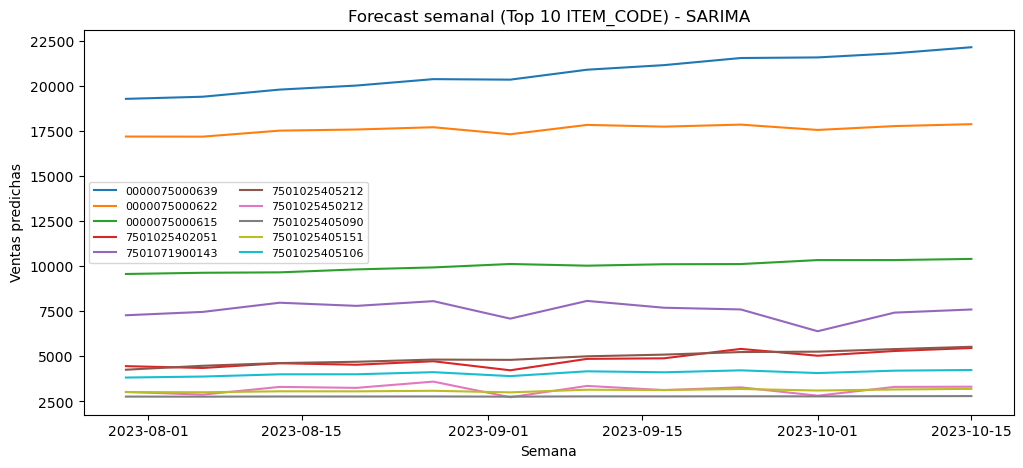

In [ ]:

plt.figure(figsize=(12,5))
for item in top10_items:
    plt.plot(df_forecast_weekly.index, df_forecast_weekly[item], label=item)

plt.title("Forecast semanal (Top 10 ITEM_CODE) - SARIMA")
plt.xlabel("Semana")
plt.ylabel("Ventas predichas")
plt.legend(ncol=2, fontsize=8)
plt.show()


In [66]:
df_VentasTotales["ITEM_CODE"] = (
    df_VentasTotales["ITEM_CODE"].astype(str).str.strip().str.zfill(13)
)

df_VentasTotales["NOMBRE"] = (
    df_VentasTotales["BRAND"].astype(str) + " | " + df_VentasTotales["ATTR1"].astype(str) + " | " + df_VentasTotales["ITEM_CODE"].astype(str)
)

map_nombre = (
    df_VentasTotales.drop_duplicates("ITEM_CODE")
    .set_index("ITEM_CODE")["NOMBRE"]
    .to_dict()
)


In [67]:
def rename_with_map(cols, mapping):
    new_cols = []
    for c in cols:
        code = str(c).strip().zfill(13)
        new_cols.append(mapping.get(code, c))  # si no existe, deja el original
    return new_cols

df_forecast_weekly_named = df_forecast_weekly.copy()
df_forecast_weekly_named.columns = rename_with_map(df_forecast_weekly_named.columns, map_nombre)

df_forecast_monthly_named = df_forecast_monthly.copy()
df_forecast_monthly_named.columns = rename_with_map(df_forecast_monthly_named.columns, map_nombre)

df_forecast_weekly_named.head()



,CLORALEX | CLORO | 0000075000639,CLORALEX | CLORO | 0000075000622,CLORALEX | CLORO | 0000075000615,BLANCATEL | CLORO | 7501025402051,CLOROX | CLORO | 7501071900143,CLORALEX | CLORO | 7501025405212,CLORALEX | CLORO | 7501025450212,CLORALEX | CLORO | 7501025405090,CLORALEX | CLORO | 7501025405151,CLORALEX | CLORO | 7501025405106
2023-07-30,19273.271436,17184.499095,9564.970542,4455.287243,7276.807822,4257.743248,3026.670511,2767.568922,3016.959620,3822.653200
2023-08-06,19392.232781,17179.114694,9632.011207,4354.204046,7462.689058,4475.990280,2876.595101,2764.254016,3007.939106,3879.172884
2023-08-13,19786.764177,17511.974097,9655.105604,4617.155709,7971.530493,4625.256793,3304.377047,2772.255444,3060.709875,4001.855964
2023-08-20,20011.650543,17574.321226,9818.932699,4533.337463,7796.979389,4697.716427,3251.811761,2771.631417,3058.315177,4004.800635
2023-08-27,20367.239106,17700.229922,9929.188159,4726.696318,8058.843551,4819.335941,3598.014608,2775.464632,3089.514063,4121.556432


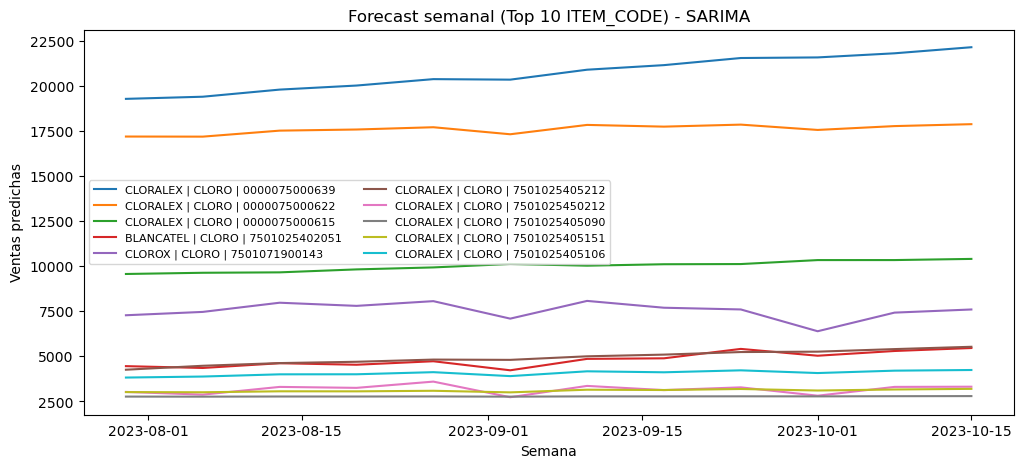

In [69]:

plt.figure(figsize=(12,5))
for item in df_forecast_weekly_named:
    plt.plot(df_forecast_weekly_named.index, df_forecast_weekly_named[item], label=item)

plt.title("Forecast semanal (Top 10 ITEM_CODE) - SARIMA")
plt.xlabel("Semana")
plt.ylabel("Ventas predichas")
plt.legend(ncol=2, fontsize=8)
plt.show()

Como habiamos visto en el entregable anterior, los cloros representan las amyores ventas en valor, por lo tanto nos decidimos a predecir estas, podemos ver que CLORALEX CLORO con el item code 0000075000639 seguirá subiendo en ventas como predicción, los demás productos se mantienen muy constantes, BLANCATEL igualmente presentaba muchas ventas y es una de las que se observa también con una pequeña tendencia,

# El modelo SARIMA se aplicó de forma independiente a los 10 productos con mayor contribución a ventas, generando un pronóstico semanal para los próximos meses. Los resultados muestran un comportamiento estable con crecimiento moderado en los principales SKUs, particularmente en los productos 0000075000639, 0000075000622 y 0000075000615, que presentan el mayor nivel de ventas pronosticadas. Por otro lado, algunos productos como 7501071900143 muestran mayor variabilidad entre semanas, lo cual sugiere sensibilidad a factores externos (promociones o cambios en demanda) que el modelo no incluye explícitamente.